# Tasca 5

### Exercici 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dbtop.csv')
#use in small DB
df = df.iloc[: , 1:]

#### Nova columna amb la data (any,mes,dia)

In [3]:
cols=["Year","Month","DayofMonth"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['date'] = df['date'].astype('datetime64[ns]')
first_column = df.pop('date')
df.insert(0, 'date', first_column)
df

,date,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,0,2008,1,3,4,2003.0,1955,2211.0,2225,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,1,2008,1,3,4,754.0,735,1002.0,1000,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,113,2008,1,3,4,908.0,845,1628.0,1610,...,6.0,10.0,0,N,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,114,2008,1,3,4,1817.0,1730,122.0,50,...,5.0,10.0,0,N,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,120,2008,1,3,4,1047.0,1030,1328.0,1320,...,9.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690895,2008-12-13,7009671,2008,12,13,6,1429.0,1355,1749.0,1729,...,9.0,14.0,0,N,0,20.0,0.0,0.0,0.0,0.0
690896,2008-12-13,7009701,2008,12,13,6,1528.0,1500,1720.0,1642,...,4.0,29.0,0,N,0,16.0,0.0,10.0,0.0,12.0
690897,2008-12-13,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
690898,2008-12-13,7009718,2008,12,13,6,1007.0,847,1149.0,1010,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0


#### Eliminar algunes columnes

In [4]:
df.drop(df.columns[[1, 2, 3,4,7,9,12,14,21,22,24]], axis = 1, inplace = True)
df

,date,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4,2003.0,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4,754.0,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4,908.0,1628.0,WN,1774,260.0,244.0,18.0,23.0,LAS,BWI,2106,0,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,4,1817.0,122.0,WN,2632,245.0,230.0,32.0,47.0,LAS,BWI,2106,0,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,4,1047.0,1328.0,WN,157,101.0,79.0,8.0,17.0,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690895,2008-12-13,6,1429.0,1749.0,DL,1563,140.0,117.0,20.0,34.0,MSP,ATL,906,0,0,20.0,0.0,0.0,0.0,0.0
690896,2008-12-13,6,1528.0,1720.0,DL,1611,112.0,79.0,38.0,28.0,SLC,PHX,507,0,0,16.0,0.0,10.0,0.0,12.0
690897,2008-12-13,6,1250.0,1617.0,DL,1621,147.0,120.0,25.0,30.0,MSP,ATL,906,0,0,3.0,0.0,0.0,0.0,22.0
690898,2008-12-13,6,1007.0,1149.0,DL,1631,162.0,122.0,99.0,80.0,ATL,IAH,689,0,0,1.0,0.0,19.0,0.0,79.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690900 entries, 0 to 690899
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               690900 non-null  datetime64[ns]
 1   DayOfWeek          690900 non-null  int64         
 2   DepTime            690900 non-null  float64       
 3   ArrTime            688327 non-null  float64       
 4   UniqueCarrier      690900 non-null  object        
 5   FlightNum          690900 non-null  int64         
 6   ActualElapsedTime  687869 non-null  float64       
 7   AirTime            687869 non-null  float64       
 8   ArrDelay           687869 non-null  float64       
 9   DepDelay           690900 non-null  float64       
 10  Origin             690900 non-null  object        
 11  Dest               690900 non-null  object        
 12  Distance           690900 non-null  int64         
 13  Cancelled          690900 non-null  int64   

#### Convertir els números de la columna en els dies de la setmana

In [6]:
#change day of the week
def dow(x):
    if x == 1:
        return "1_Monday"
    elif x == 2:
        return "2_Tuesday"
    elif x == 3:
        return "3_Wednesday"
    elif x == 4:
        return "4_Thursday"
    elif x == 5:
        return "5_Friday"
    elif x == 6:
        return "6_Saturday"
    else:
        return "7_Sunday"

df["DayOfWeek"] = df["DayOfWeek"].apply(dow)

df

,date,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4_Thursday,2003.0,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4_Thursday,754.0,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4_Thursday,908.0,1628.0,WN,1774,260.0,244.0,18.0,23.0,LAS,BWI,2106,0,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,4_Thursday,1817.0,122.0,WN,2632,245.0,230.0,32.0,47.0,LAS,BWI,2106,0,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,4_Thursday,1047.0,1328.0,WN,157,101.0,79.0,8.0,17.0,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690895,2008-12-13,6_Saturday,1429.0,1749.0,DL,1563,140.0,117.0,20.0,34.0,MSP,ATL,906,0,0,20.0,0.0,0.0,0.0,0.0
690896,2008-12-13,6_Saturday,1528.0,1720.0,DL,1611,112.0,79.0,38.0,28.0,SLC,PHX,507,0,0,16.0,0.0,10.0,0.0,12.0
690897,2008-12-13,6_Saturday,1250.0,1617.0,DL,1621,147.0,120.0,25.0,30.0,MSP,ATL,906,0,0,3.0,0.0,0.0,0.0,22.0
690898,2008-12-13,6_Saturday,1007.0,1149.0,DL,1631,162.0,122.0,99.0,80.0,ATL,IAH,689,0,0,1.0,0.0,19.0,0.0,79.0


#### Descripició d'alguna columna primer amb text després amb xifres

In [7]:
df[["UniqueCarrier", "Origin", "Dest"]].describe()

,UniqueCarrier,Origin,Dest
count,690900,690900,690900
unique,18,29,29
top,AA,ORD,ORD
freq,110661,53096,48287


In [8]:
df[["Distance"]].describe()

,Distance
count,690900.000000
mean,1009.636444
std,610.167390
min,11.000000
25%,585.000000
50%,888.000000
75%,1379.000000
max,2724.000000


#### Troba les columnes amb valors nuls

In [9]:
df.isnull().sum()

date                      0
DayOfWeek                 0
DepTime                   0
ArrTime                2573
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      3031
AirTime                3031
ArrDelay               3031
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         247101
WeatherDelay         247101
NASDelay             247101
SecurityDelay        247101
LateAircraftDelay    247101
dtype: int64

In [10]:
#com el percentatge (0.3%) de vols amb retras a l'arribada és molt baix, eliminem la fila
df.dropna(subset=['ArrDelay'], how='all', inplace=True)
df.isnull().sum()

date                      0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         244070
WeatherDelay         244070
NASDelay             244070
SecurityDelay        244070
LateAircraftDelay    244070
dtype: int64

#### Trobar la companyia amb la mitjana de restrassos en les arribades més elevada

In [92]:
#df1 = df.groupby('UniqueCarrier')
#df1['ArrDelay'].agg([np.mean, np.sum]).sort_values(by='mean', ascending=False)

df1a = df.groupby('UniqueCarrier').agg({'ArrDelay': 'sum'})
df1a['ArrDelay_mean'] = df.groupby('UniqueCarrier').agg({'ArrDelay': 'mean'})
df1a.reset_index(inplace=True)
df1a=df1a.sort_values(by='ArrDelay_mean',  ascending=False)
df1a

,UniqueCarrier,ArrDelay,ArrDelay_mean
17,YV,539704.0,59.334213
3,B6,1456556.0,57.930875
11,OH,958893.0,54.180868
16,XE,811705.0,53.741062
1,AA,5216910.0,47.389835
13,UA,4308067.0,47.334113
6,EV,122292.0,47.017301
9,MQ,752255.0,46.295464
0,9E,134685.0,45.517067
8,FL,1613817.0,44.675608


#### Trobar la companyia amb la suma de restrassos en les sortida més elevada

In [12]:
#df1a['DepDelay'].agg([np.sum, np.mean]).sort_values(by='sum', ascending=False)

#### Una nova base amb el número de vols entre aeroports

In [13]:
df12=pd.DataFrame(df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).reset_index())
df12.columns = ['Origin', 'Dest', 'flights']
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Origin   733 non-null    object
 1   Dest     733 non-null    object
 2   flights  733 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


#### Taula amb el major número de vols entre 2 aeroports (sumant les anades i les tornades)

In [14]:
df12[['Origin','Dest']] = pd.DataFrame(np.sort(df12[['Origin','Dest']].values, axis=1))
df13=df12.groupby(['Origin', 'Dest']).flights.sum().reset_index().sort_values(by='flights', ascending=False).reset_index(drop='index')
#df13=df13.sort_values(by='flights', ascending=False)
df13.head(100)


,Origin,Dest,flights
0,LAX,SFO,8749
1,LGA,ORD,7656
2,ATL,LGA,7368
3,LAS,LAX,6457
4,DFW,ORD,6209
...,...,...,...
95,DFW,MCO,2552
96,SFO,SLC,2543
97,IAH,LGA,2505
98,IAD,LAX,2498


In [45]:
df13b=df13[:20]
df13b.head(100)

,Origin,Dest,flights
0,LAX,SFO,8749
1,LGA,ORD,7656
2,ATL,LGA,7368
3,LAS,LAX,6457
4,DFW,ORD,6209
5,ATL,EWR,6033
6,EWR,ORD,5901
7,ATL,DFW,5898
8,LAS,PHX,5810
9,DEN,LAX,5721


In [46]:
df13b["Route"] = df13b["Origin"] + ' to ' + df13b["Dest"]
df13b.drop(columns=['Origin', 'Dest'],inplace=True)
df13b = df13b[['Route', 'flights']]
df13b

<ipython-input-46-a95481809702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13b["Route"] = df13b["Origin"] + ' to ' + df13b["Dest"]
/Users/psans/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Route,flights
0,LAX to SFO,8749
1,LGA to ORD,7656
2,ATL to LGA,7368
3,LAS to LAX,6457
4,DFW to ORD,6209
5,ATL to EWR,6033
6,EWR to ORD,5901
7,ATL to DFW,5898
8,LAS to PHX,5810
9,DEN to LAX,5721


<AxesSubplot:ylabel='Route'>

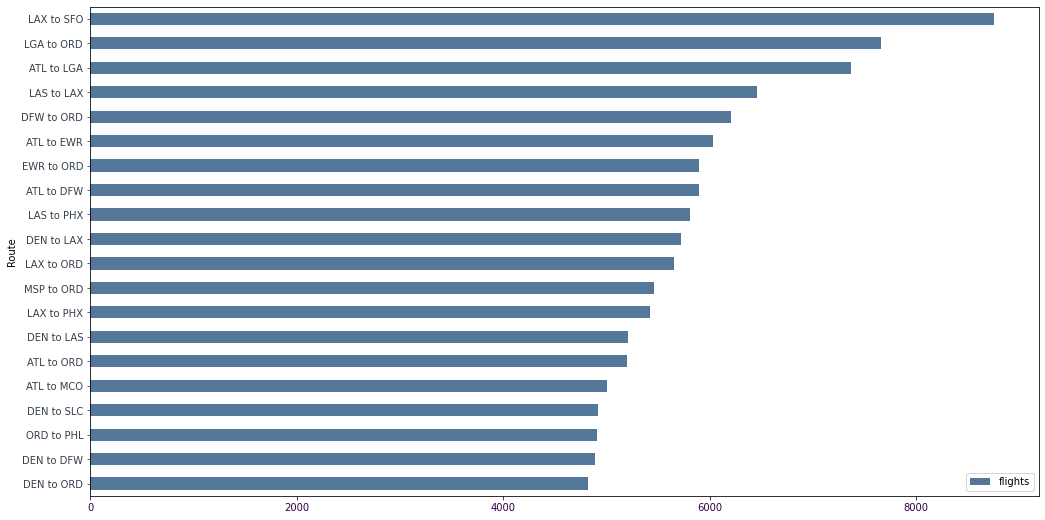

In [76]:
#df13b = df13b.sort_values(by=['flights'])
#df13b.plot.barh(x='Route',y='flights' , title='Most served routes', color='#336699',figsize=(17,15))

df13b.plot(kind='barh',x='Route',y='flights',figsize=(17,9), color='#557799')



#### número de vols i percentatge de vols que van arribar tard

In [17]:
nn, tot =0 , 0
for dl in df['ArrDelay']:
    if dl > 1:
        nn=nn+1
        tot=tot+dl
print('Total vols retrassats en arribar:', nn, 'd\'un total de',len(df['ArrDelay']), 'Dona un percentatge de:',
      float("{:.2f}".format((nn/len(df['ArrDelay'])) * 100)),'%')

print('mitjana de retràs:', int(tot/nn), 'minuts')

Total vols retrassats en arribar: 589314 d'un total de 687869 Dona un percentatge de: 85.67 %
mitjana de retràs: 50 minuts


#### llista de rutes més llargues 

In [18]:
longest = df[['Origin', 'Dest','AirTime']].sort_values(by='AirTime',ascending=False)
longest.drop_duplicates(keep=False,inplace=True)

longest.reset_index(drop=True, inplace=True)
longest.head(20)

,Origin,Dest,AirTime
0,LAS,JFK,595.0
1,HOU,JFK,542.0
2,BOS,LAX,431.0
3,BOS,SFO,426.0
4,BOS,DEN,424.0
5,JFK,SFO,418.0
6,JFK,LAX,417.0
7,BOS,LAX,416.0
8,JFK,SFO,413.0
9,BOS,LAX,413.0


In [19]:
long = longest.groupby(['Origin','Dest'])['AirTime'].max().unstack()
long.head(50)

Dest,ATL,BOS,BWI,CLT,CVG,DEN,DFW,DTW,EWR,FLL,...,MIA,MSP,ORD,PHL,PHX,SAN,SEA,SFO,SLC,TPA
Origin,,,,,,,,,,,,,,,,,,,,,
ATL,NaN,184.0,136.0,98.0,165.0,236.0,211.0,148.0,208.0,124.0,...,142.0,183.0,201.0,168.0,271.0,318.0,370.0,343.0,283.0,132.0
BOS,192.0,NaN,108.0,165.0,170.0,424.0,274.0,141.0,122.0,238.0,...,244.0,234.0,230.0,133.0,380.0,408.0,384.0,426.0,349.0,228.0
BWI,144.0,131.0,NaN,107.0,165.0,296.0,218.0,110.0,74.0,187.0,...,168.0,171.0,187.0,54.0,344.0,397.0,343.0,389.0,331.0,192.0
CLT,100.0,172.0,112.0,NaN,88.0,258.0,213.0,157.0,162.0,162.0,...,143.0,189.0,219.0,167.0,309.0,325.0,356.0,372.0,263.0,127.0
CVG,110.0,157.0,179.0,108.0,NaN,198.0,197.0,96.0,194.0,170.0,...,161.0,152.0,180.0,180.0,269.0,292.0,316.0,332.0,265.0,137.0
DEN,217.0,307.0,229.0,205.0,151.0,NaN,187.0,209.0,282.0,250.0,...,236.0,161.0,194.0,243.0,155.0,174.0,193.0,198.0,114.0,224.0
DFW,153.0,258.0,194.0,164.0,237.0,170.0,NaN,180.0,282.0,182.0,...,188.0,167.0,202.0,259.0,199.0,204.0,302.0,248.0,177.0,171.0
DTW,156.0,144.0,104.0,123.0,83.0,208.0,223.0,NaN,144.0,200.0,...,212.0,167.0,102.0,127.0,295.0,330.0,317.0,343.0,286.0,160.0
EWR,166.0,83.0,56.0,154.0,186.0,288.0,263.0,121.0,NaN,206.0,...,225.0,232.0,186.0,25.0,367.0,402.0,393.0,411.0,327.0,198.0


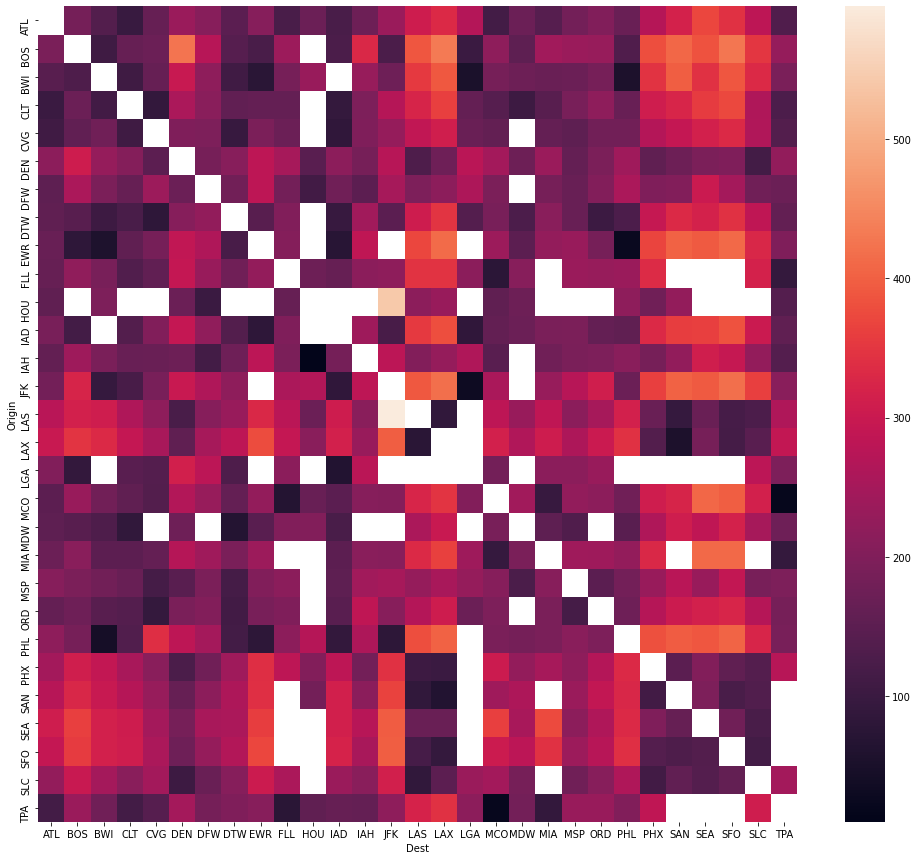

In [20]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(long)

#### Afegir columnes segons horaris

In [21]:
def horari(hh):
    if hh > 2300:
        val = 'nit'
    elif hh > 2000:
        val = 'vespre'
    elif hh > 1600:
        val = 'tarda'
    elif hh > 1200:
        val = 'migdia'
    elif hh > 800:
        val = 'matí'
    elif hh > 600:
        val = 'matinada'
    else:
        val='nit'
    return val

In [22]:
df.head()

,date,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4_Thursday,2003.0,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4_Thursday,754.0,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4_Thursday,908.0,1628.0,WN,1774,260.0,244.0,18.0,23.0,LAS,BWI,2106,0,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,4_Thursday,1817.0,122.0,WN,2632,245.0,230.0,32.0,47.0,LAS,BWI,2106,0,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,4_Thursday,1047.0,1328.0,WN,157,101.0,79.0,8.0,17.0,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN


In [23]:
df["horari_sortida"] = df["DepTime"].apply(horari)

first_column = df.pop('horari_sortida')
df.insert(3, 'horari_sortida', first_column)
df["horari_arribada"] = df["ArrTime"].apply(horari)
first_column = df.pop('horari_arribada')
df.insert(5, 'horari_arribada', first_column)

In [24]:
df.head(30)

,date,DayOfWeek,DepTime,horari_sortida,ArrTime,horari_arribada,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4_Thursday,2003.0,vespre,2211.0,vespre,WN,335,128.0,116.0,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4_Thursday,754.0,matinada,1002.0,matí,WN,3231,128.0,113.0,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4_Thursday,908.0,matí,1628.0,tarda,WN,1774,260.0,244.0,...,LAS,BWI,2106,0,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,4_Thursday,1817.0,tarda,122.0,nit,WN,2632,245.0,230.0,...,LAS,BWI,2106,0,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,4_Thursday,1047.0,matí,1328.0,migdia,WN,157,101.0,79.0,...,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN
5,2008-01-03,4_Thursday,2232.0,vespre,108.0,nit,WN,632,96.0,77.0,...,LAS,DEN,629,0,0,0.0,0.0,7.0,0.0,56.0
6,2008-01-03,4_Thursday,1512.0,migdia,1802.0,tarda,WN,706,110.0,88.0,...,LAS,DEN,629,0,0,0.0,0.0,0.0,0.0,112.0
7,2008-01-03,4_Thursday,2025.0,vespre,2301.0,nit,WN,908,96.0,78.0,...,LAS,DEN,629,0,0,7.0,0.0,0.0,0.0,9.0
8,2008-01-03,4_Thursday,1439.0,migdia,1720.0,tarda,WN,1582,101.0,85.0,...,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN
9,2008-01-03,4_Thursday,1627.0,tarda,1916.0,tarda,WN,2907,109.0,80.0,...,LAS,DEN,629,0,0,2.0,0.0,0.0,0.0,14.0


#### Convertir columnes DepTime i ArrTime a format HH:MM

In [25]:
df['DepTime']=df['DepTime'].astype(int)
df['DepTime']=pd.to_datetime(df['DepTime'], unit='m').dt.strftime('%H:%M')



In [26]:
df.head()

,date,DayOfWeek,DepTime,horari_sortida,ArrTime,horari_arribada,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4_Thursday,09:23,vespre,2211.0,vespre,WN,335,128.0,116.0,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4_Thursday,12:34,matinada,1002.0,matí,WN,3231,128.0,113.0,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4_Thursday,15:08,matí,1628.0,tarda,WN,1774,260.0,244.0,...,LAS,BWI,2106,0,0,18.0,0.0,0.0,0.0,0.0
3,2008-01-03,4_Thursday,06:17,tarda,122.0,nit,WN,2632,245.0,230.0,...,LAS,BWI,2106,0,0,7.0,0.0,0.0,0.0,25.0
4,2008-01-03,4_Thursday,17:27,matí,1328.0,migdia,WN,157,101.0,79.0,...,LAS,DEN,629,0,0,NaN,NaN,NaN,NaN,NaN


In [27]:
df['ArrTime']= df['ArrTime'].notna().astype(int)
df['ArrTime']=pd.to_datetime(df['ArrTime'], unit='m').dt.strftime('%H:%M')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687869 entries, 0 to 690899
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               687869 non-null  datetime64[ns]
 1   DayOfWeek          687869 non-null  object        
 2   DepTime            687869 non-null  object        
 3   horari_sortida     687869 non-null  object        
 4   ArrTime            687869 non-null  object        
 5   horari_arribada    687869 non-null  object        
 6   UniqueCarrier      687869 non-null  object        
 7   FlightNum          687869 non-null  int64         
 8   ActualElapsedTime  687869 non-null  float64       
 9   AirTime            687869 non-null  float64       
 10  ArrDelay           687869 non-null  float64       
 11  DepDelay           687869 non-null  float64       
 12  Origin             687869 non-null  object        
 13  Dest               687869 non-null  object  

In [29]:
options = ["matí", "migdia", "tarda", "vespre", "nit", "matinada"]
for i in range(len(options)):
    print(str(i+1) + ":", options[i])
while True:
    inp = int(input("Entra un número: "))
    if inp in range(1, len(options)+1):
        inp = options[inp-1]
        
        print(inp)
        break
    else:
        print("Entrada invàlida. Torna-ho a provar")
        continue

dd2=df.groupby(['horari_arribada','UniqueCarrier']).size()
print('Ordre de les companyies amb mes vols al(a)',inp,':')
type(dd2)
dd2[inp].sort_values(ascending=False)


1: matí
2: migdia
3: tarda
4: vespre
5: nit
6: matinada
Entra un número: 3
tarda
Ordre de les companyies amb mes vols al(a) tarda :


UniqueCarrier
AA    31791
UA    27145
WN    26797
DL    19986
CO    18365
US    15215
NW    11478
FL    10040
B6     5933
OH     5242
MQ     5033
F9     4744
XE     4346
OO     4273
AS     3521
YV     2282
9E      973
EV      756
dtype: int64

In [34]:
df_gr2 = df.groupby(['horari_sortida','DayOfWeek']).size()

df_gr2

horari_sortida  DayOfWeek  
matinada        1_Monday        5107
                2_Tuesday       4049
                3_Wednesday     3959
                4_Thursday      4043
                5_Friday        4931
                6_Saturday      4223
                7_Sunday        3633
matí            1_Monday       21395
                2_Tuesday      18446
                3_Wednesday    18197
                4_Thursday     18682
                5_Friday       21209
                6_Saturday     18435
                7_Sunday       17099
migdia          1_Monday       27512
                2_Tuesday      24414
                3_Wednesday    24425
                4_Thursday     26126
                5_Friday       29722
                6_Saturday     23481
                7_Sunday       25501
nit             1_Monday        2671
                2_Tuesday       2703
                3_Wednesday     2751
                4_Thursday      3504
                5_Friday        3643
          

<AxesSubplot:>

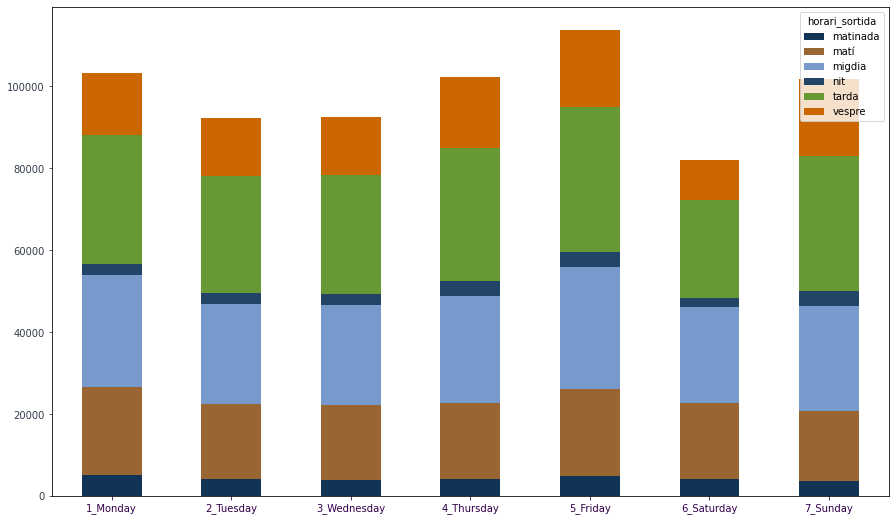

In [90]:
newdf = df_gr2.unstack(0)
newdf.index = [ts  for ts in newdf.index]
color=['#113355','#996633','#7799cc','#224466','#669933','#cc6600','#112233']
newdf.plot(kind='bar', rot=0, stacked=True,figsize=(15,9),color=color)